# DTACSNet: onboard cloud detection and atmospheric correction with end-to-end deep learning emulators

This repo contains an open implementation to run inference with DTACSNet models for atmospheric correction and also p. The trained models provided here are customized to the band configuration that will be available in Phi-Sat-II. Trained models are released under a [Creative Commons non-commercial licence](https://creativecommons.org/licenses/by-nc/4.0/legalcode.txt)
<img src="https://mirrors.creativecommons.org/presskit/buttons/88x31/png/by-nc.png" alt="licence" width="60"/>.

In [1]:
import sys
sys.path.append("..")

## Load data

In [2]:
import rasterio
import os

phisat2_bands = ["B2","B3","B4","B5","B6","B7","B8"]

folder_examples = "examples"

with rasterio.open(os.path.join(folder_examples,"S2L1C.tif")) as rst:
    indexes_read = [rst.descriptions.index(b) + 1 for b in phisat2_bands]
    data = rst.read(indexes_read)
data.shape

(7, 509, 509)

In [3]:
data

array([[[ 991.,  982.,  966., ..., 1089., 1096., 1059.],
        [ 996.,  992.,  992., ..., 1062., 1080., 1076.],
        [1010.,  962.,  976., ..., 1064., 1072., 1094.],
        ...,
        [1053., 1550., 1870., ...,  952.,  979.,  988.],
        [1404., 2125., 2356., ...,  979.,  980., 1004.],
        [1608., 2245., 2476., ...,  960.,  973.,  983.]],

       [[ 954.,  932.,  922., ..., 1044., 1063., 1045.],
        [ 969.,  957.,  958., ..., 1006., 1046., 1055.],
        [ 997.,  956.,  944., ..., 1004., 1062., 1077.],
        ...,
        [1268., 1925., 2120., ...,  998., 1013.,  961.],
        [1614., 2223., 2387., ..., 1001., 1001.,  975.],
        [1667., 2116., 2384., ..., 1004., 1013., 1015.]],

       [[ 791.,  785.,  692., ..., 1142., 1115., 1039.],
        [ 817.,  802.,  768., ..., 1013., 1093., 1099.],
        [ 856.,  745.,  750., ...,  976., 1014., 1062.],
        ...,
        [1605., 2188., 2344., ...,  662.,  617.,  657.],
        [1740., 2223., 2446., ...,  649.,  62

# Atmospheric correction model
## Load model

In [4]:
from dtacs.model_wrapper import ACModel
import torch

model_atmospheric_correction = ACModel(input_bands=phisat2_bands,output_bands=phisat2_bands)
model_atmospheric_correction.load_weights("../models/model_ac_phisat2.pt")

/home/gonzalo/miniconda3/envs/starcop/lib/python3.9/site-packages/tqdm/auto.py:22: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm


## Run inference

In [5]:
ac_output = model_atmospheric_correction.predict(data)
ac_output

array([[[ 417,  396,  388, ...,  526,  537,  506],
        [ 423,  416,  412, ...,  489,  522,  521],
        [ 447,  390,  397, ...,  496,  530,  552],
        ...,
        [ 451, 1153, 1614, ...,  394,  445,  427],
        [ 989, 1968, 2301, ...,  419,  437,  461],
        [1237, 2103, 2449, ...,  408,  436,  436]],

       [[ 710,  678,  668, ...,  825,  852,  833],
        [ 728,  713,  710, ...,  770,  833,  846],
        [ 762,  718,  700, ...,  772,  857,  875],
        ...,
        [1059, 1913, 2236, ...,  766,  794,  721],
        [1575, 2413, 2677, ...,  768,  775,  749],
        [1661, 2303, 2699, ...,  775,  795,  790]],

       [[ 646,  629,  532, ..., 1044, 1027,  948],
        [ 674,  651,  612, ...,  900, 1004, 1012],
        [ 722,  592,  594, ...,  859,  918,  970],
        ...,
        [1530, 2249, 2493, ...,  494,  452,  483],
        [1768, 2415, 2710, ...,  479,  458,  485],
        [1618, 2247, 2780, ...,  424,  459,  456]],

       ...,

       [[2503, 2541, 253

## Plot

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


Text(0.5, 1.0, 'NIRRG L2A')

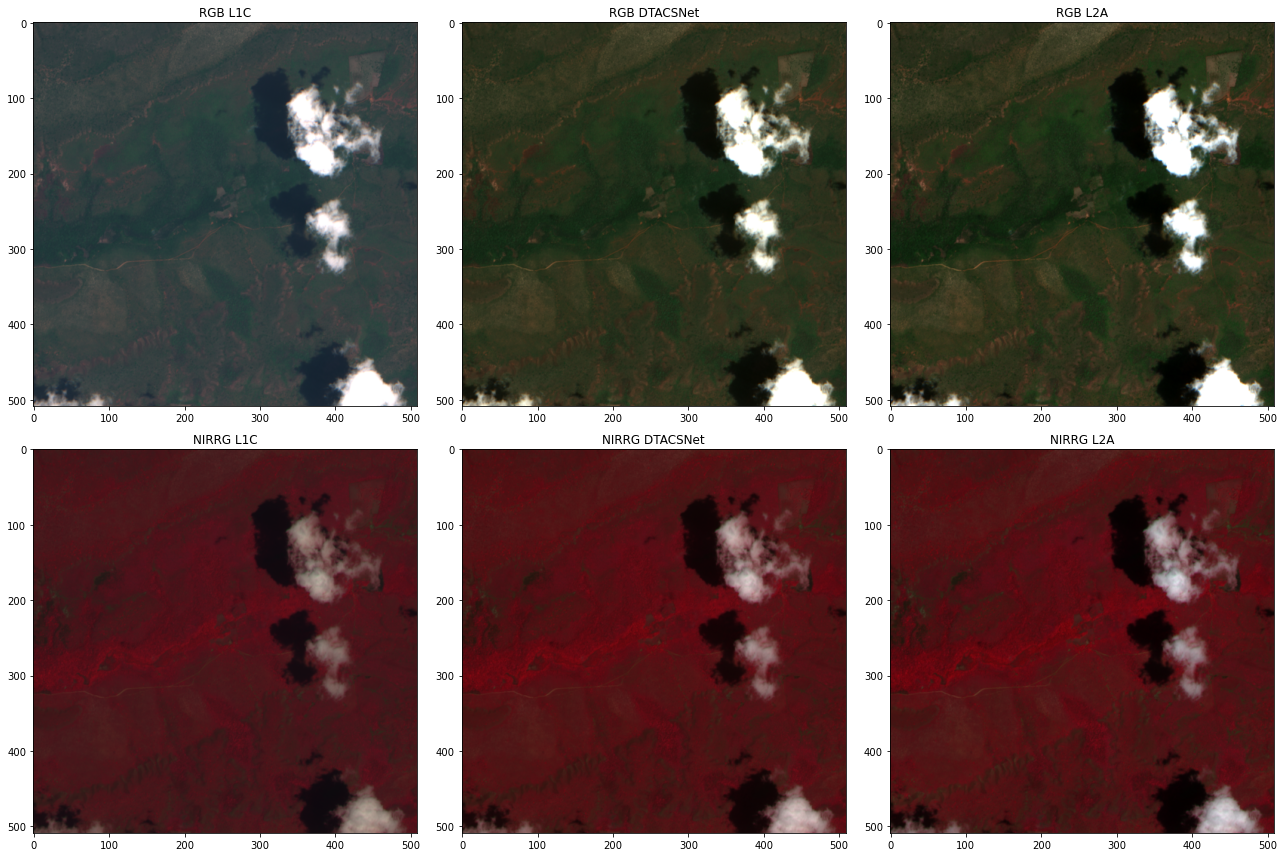

In [6]:
import matplotlib.pyplot as plt
from dtacs import plot
import rasterio.plot as rstplt

# Load L2A to show
with rasterio.open(os.path.join(folder_examples,"S2L2A.tif")) as rst:
    indexes_read = [rst.descriptions.index(b) + 1 for b in phisat2_bands]
    data_sen2cor = rst.read(indexes_read)

fig, ax = plt.subplots(2,3,figsize=(18,12),tight_layout=True)

rstplt.show(data[2::-1,...]/4_000,ax=ax[0,0])
ax[0,0].set_title("RGB L1C")
rstplt.show(ac_output[2::-1,...]/4_000,ax=ax[0,1])
ax[0,1].set_title("RGB DTACSNet")
rstplt.show(data_sen2cor[2::-1,...]/4_000,ax=ax[0,2])
ax[0,2].set_title("RGB L2A")

nirredgreen = [-1, 2, 1]
rstplt.show(data[nirredgreen,...]/10_000,ax=ax[1,0])
ax[1,0].set_title("NIRRG L1C")
rstplt.show(ac_output[nirredgreen,...]/10_000,ax=ax[1,1])
ax[1,1].set_title("NIRRG DTACSNet")
rstplt.show(data_sen2cor[nirredgreen,...]/10_000,ax=ax[1,2])
ax[1,2].set_title("NIRRG L2A")


# Cloud detection model
## Load model

In [7]:
from dtacs.model_wrapper import CDModel
import torch
assert torch.__version__ >= "1.13", f"Requires torch version >=1.13 current version {torch.__version__ }"

model_cd_torchscript = torch.jit.load('../models/cloud4bands.pt', map_location='cpu')
model_cloud_detection = CDModel(model=model_cd_torchscript)

## Run inference

In [8]:
data_cloud_detection = data[[-1,2,1,0],...]

cd_output = model_cloud_detection.predict(data_cloud_detection)
cd_output

array([[0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       ...,
       [1, 1, 1, ..., 0, 0, 0],
       [0, 1, 1, ..., 0, 0, 0],
       [0, 1, 1, ..., 0, 0, 0]], dtype=uint8)

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


Text(0.5, 1.0, 'Cloud shadow mask')

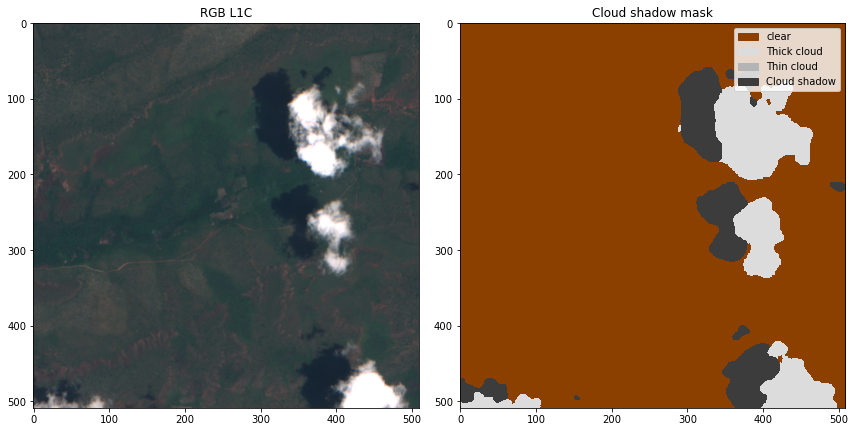

In [9]:
fig, ax = plt.subplots(1,2,figsize=(12,6),tight_layout=True)

nirredgreen = [-1, 2, 1]

rstplt.show(data[2::-1,...]/4_000,ax=ax[0])
ax[0].set_title("RGB L1C")

plot.plot_cloudSEN12mask(cd_output,ax=ax[1])
ax[1].set_title("Cloud shadow mask")